In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, plot_roc_curve

from sklearn.inspection import permutation_importance

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
path = 'data/telco-customer-churn.csv'

In [3]:
# wrangle data

def wrangle(data_path):
    # load data into DataFrame
    df = pd.read_csv(data_path)
    
    # Set target variable to integer values
    df.loc[df['Churn'] == 'No', 'churn'] = 0
    df.loc[df['Churn'] == 'Yes', 'churn'] = 1
    
    # drop old target variable
    df.drop(columns=["Churn"], inplace=True)
    
    # set index of DataFrame to `customerID`
    df.index = df['customerID']
    
    # drop columns
    df.drop(columns='customerID', inplace=True)
    
    return df

In [4]:
df = wrangle(path)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0.0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


# What percentage of users have churned?

In [6]:
churn = len(df[df['churn'] == 1])
percent_churn = round(churn / len(df) * 100, 2)
percent_churn

26.54

# Split Data

In [7]:
# Split Data
X = df.drop(columns='churn')
y = df['churn']

In [8]:
X.shape, y.shape

((7043, 19), (7043,))

In [9]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [10]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
6542-LWGXJ,Male,0,Yes,No,3,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.00,78.25
2661-GKBTK,Male,0,Yes,Yes,60,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),76.95,4543.95
5423-BHIXO,Female,0,No,No,32,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,54.20,1739.6
0913-XWSCN,Male,0,Yes,Yes,55,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),85.50,4713.4
4770-QAZXN,Female,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.45,232.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877-LGWXO,Male,1,Yes,No,18,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,78.55,1422.65
3774-VBNXY,Female,0,Yes,Yes,64,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,1277.75
1761-AEZZR,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.55,79.55


# Logistic Regression

In [12]:
# Create sklearn pipeline to automate encoding, scaling, and training

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression()
)

model_lr.fit(X_train, y_train)

/Users/andrewlee/.local/share/virtualenvs/user_churn_analysis-hR6j8vBr/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/user_churn_analysis-hR6j8vBr/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'Partner', 'Dependents',
                                     'PhoneService', 'MultipleLines',
                                     'InternetService', 'OnlineSecurity',
                                     'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'Contract',
                                     'PaperlessBilling', 'PaymentMethod',
                                     'TotalCharges'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [13]:
# Churn probability
np.set_printoptions(suppress=True)
model_lr.predict_proba(X_test)

array([[0.9617223 , 0.0382777 ],
       [0.99992102, 0.00007898],
       [0.96194207, 0.03805793],
       ...,
       [0.00017307, 0.99982693],
       [0.99967857, 0.00032143],
       [0.5708955 , 0.4291045 ]])

In [14]:
# Churn Predictions
model_lr.predict(X_test)

array([0., 0., 0., ..., 1., 0., 0.])

In [15]:
# Accuracy Score
model_lr.score(X_test, y_test)

0.7672107877927609

# Confusion Matrix, ROC Curve

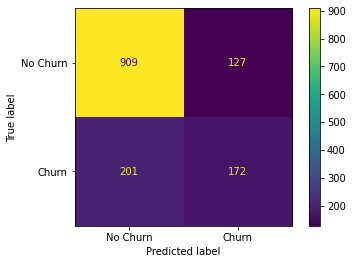

In [16]:
plot_confusion_matrix(model_lr, X_test, y_test, values_format='.0f',
                      display_labels=['No Churn', 'Churn'])

In [17]:
print(classification_report(y_test, model_lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      1036
         1.0       0.58      0.46      0.51       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.75      0.77      0.76      1409



## ROC Curve

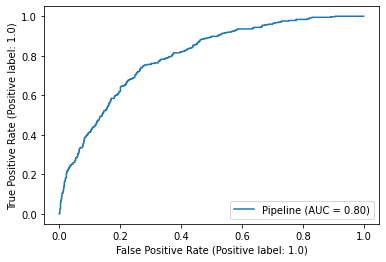

In [18]:
lr = plot_roc_curve(model_lr, X_test, y_test)

In [19]:
# Classify each user as churned or not churned
classify_df = X_test.copy()
np.set_printoptions(suppress=True)
classify_df["Churn_Probability"] = model_lr.predict_proba(X_test)[:,1]
classify_df['Churn'] = model_lr.predict(X_test)

In [20]:
classify_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Probability,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
6542-LWGXJ,Male,0,Yes,No,3,No,No phone service,DSL,No,No,...,No,No,No,Month-to-month,No,Mailed check,25.00,78.25,0.038278,0.0
2661-GKBTK,Male,0,Yes,Yes,60,Yes,No,DSL,No,Yes,...,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),76.95,4543.95,0.000079,0.0
5423-BHIXO,Female,0,No,No,32,Yes,Yes,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,54.20,1739.6,0.038058,0.0
0913-XWSCN,Male,0,Yes,Yes,55,Yes,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,No,Bank transfer (automatic),85.50,4713.4,0.256675,0.0
4770-QAZXN,Female,0,No,No,13,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.45,232.1,0.000125,0.0


In [21]:
# Permutation Feature Importance

perm_imp = permutation_importance(
    model_lr, 
      X_test, 
      y_test, 
      n_repeats=5, 
      n_jobs=-1, 
      random_state=42
)

<AxesSubplot:title={'center':'Permutation Feature Importances'}>

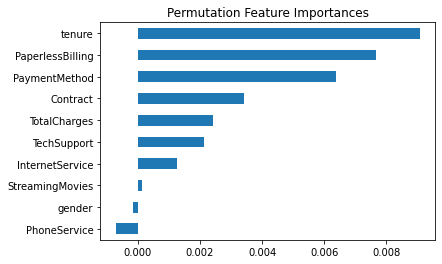

In [22]:
data = {'imp_mean': perm_imp['importances_mean'],
        'imp_std': perm_imp['importances_std']}

perm_df = pd.DataFrame(data, index=X_test.columns).sort_values('imp_mean')
perm_df['imp_mean'].tail(10).plot(kind='barh', title='Permutation Feature Importances')

In [23]:
perm_df

,imp_mean,imp_std
OnlineBackup,-0.007665,0.007257
Partner,-0.003833,0.003929
Dependents,-0.002697,0.001376
DeviceProtection,-0.002555,0.001529
SeniorCitizen,-0.002413,0.000724
StreamingTV,-0.002413,0.002825
MonthlyCharges,-0.001845,0.002860
OnlineSecurity,-0.001703,0.003436
MultipleLines,-0.001419,0.002943
PhoneService,-0.000710,0.001851


# Simplify LogReg Model

In [24]:
# Model 2: Simplified Model (Fewer features)
df2 = df[['tenure', 'InternetService', 'churn']]
df2.head()

,tenure,InternetService,churn
customerID,,,
7590-VHVEG,1,DSL,0.0
5575-GNVDE,34,DSL,0.0
3668-QPYBK,2,DSL,1.0
7795-CFOCW,45,DSL,0.0
9237-HQITU,2,Fiber optic,1.0


In [25]:
# Split Data
X2 = df2.drop(columns='churn')
y2 = df2['churn']

In [26]:
# Train Test Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

In [27]:
# Create model pipeline
model_lr2 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression()
)

model_lr2.fit(X_train2, y_train2)

/Users/andrewlee/.local/share/virtualenvs/user_churn_analysis-hR6j8vBr/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['InternetService'], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [28]:
# Model score
model_lr2.score(X_test2, y_test2)

0.7927608232789212

In [29]:
# Permutation Feature Importances for new model
perm_imp2 = permutation_importance(
    model_lr2, 
      X_test2, 
      y_test2, 
      n_repeats=5, 
      n_jobs=-1, 
      random_state=42
)

<AxesSubplot:title={'center':'Permutation Feature Importances'}>

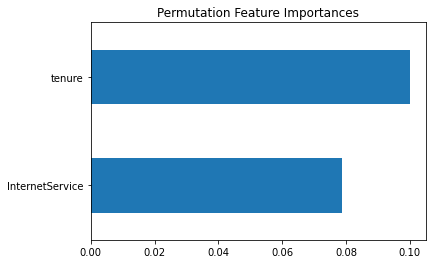

In [30]:
data = {'imp_mean': perm_imp2['importances_mean'],
        'imp_std': perm_imp2['importances_std']}

perm_df2 = pd.DataFrame(data, index=X_test2.columns).sort_values('imp_mean')
perm_df2['imp_mean'].tail(10).plot(kind='barh', title='Permutation Feature Importances')

# Analysis:
Model Performance ~79% accuracy. Precision and Recall are low for predicting churn, ~65% and ~60%, respectively. The most important features in predicting user churn are `tenure` and `InternetService` (Found using Permutation Feature Importances technique). Dropping columns that don't contribute to the model (features that contribute less than 1% increase to model performance) improved the accuracy of the model by simplifying it. If I wanted to improve the accuracy score further, I would tune the hyperparameters of Logistic Regression/Random Forest using Randomized Search to find important hyperparameters, then follow it up with brute force Grid Search on specific parameters to optimize further.

For the purpose of this analysis, incremental accuracy improvements is not the goal. Understanding the patterns in the data and finding the most important features in correctly predicting churned users is the goal. That way these features can be focused on when diving deeper into the analysis, visualizing, and communicating these insights using Tableau.

Next Step is to import this dataset into Tableau and focus on the top features (`tenure` and `InternetService`) that contribute to the accuracy of the model to try to find and visualize the relationships between these features and `Churn`. This will help us understand which users will likely churn in the future and how to create initiatives around decreasing churn and increasing the LTV of users.


# Random Forest

In [31]:
model_rf = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

model_rf.fit(X_train, y_train)

/Users/andrewlee/.local/share/virtualenvs/user_churn_analysis-hR6j8vBr/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'Partner', 'Dependents',
                                     'PhoneService', 'MultipleLines',
                                     'InternetService', 'OnlineSecurity',
                                     'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'Contract',
                                     'PaperlessBilling', 'PaymentMethod',
                                     'TotalCharges'])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [32]:
model_rf.predict_proba(X_test)

array([[0.6 , 0.4 ],
       [0.95, 0.05],
       [0.83, 0.17],
       ...,
       [0.18, 0.82],
       [0.58, 0.42],
       [0.55, 0.45]])

In [33]:
model_rf.predict(X_test)

array([0., 0., 0., ..., 1., 0., 0.])

In [34]:
model_rf.score(X_test, y_test)

0.7799858055358411

In [35]:
# 2nd Random Forest Model
model_rf2 = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    RandomForestClassifier(random_state=42, n_jobs=-2)
)

model_rf2.fit(X_train2, y_train2)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-2, random_state=42))])

In [36]:
model_rf2.score(X_test2, y_test2)

0.7998580553584103

# Random EDA Practice

In [37]:
df_gender = df.groupby(['gender']).mean()
df_gender

,SeniorCitizen,tenure,MonthlyCharges,churn
gender,,,,
Female,0.162844,32.244553,65.204243,0.269209
Male,0.161463,32.495359,64.327482,0.261603


### isin()

In [38]:
internet = ['Fiber optic', 'DSL']
df.loc[df['InternetService'].isin(internet)].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0.0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


# Churn if tenure < 10 and 
# Contract = Month-to-month, One year and 
# Churn=1

In [39]:
contract = ['Month-to-month', 'One year']
new_df = df[(df['tenure'] <= 10) & (df['Contract'].isin(contract)) & (df['churn'] == 1)]
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1.0
4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,1.0
8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1.0


# Neural Network

In [40]:
X_train.shape, y_train.shape

((5634, 19), (5634,))

In [41]:
X_train.shape[1]

19

In [42]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
0812-WUPTB,Male,1,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,70.85,70.85
2451-YMUXS,Male,1,No,No,67,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),64.55,4250.1
1952-DVVSW,Female,0,Yes,No,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,184.4
7593-JNWRU,Male,0,Yes,Yes,6,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.60,260.8
3648-GZPHF,Male,0,Yes,Yes,32,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,Yes,Mailed check,36.25,1151.05


In [43]:
ohe = OneHotEncoder(use_cat_names=True)

ohe.fit(X_train)

XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)

/Users/andrewlee/.local/share/virtualenvs/user_churn_analysis-hR6j8vBr/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [44]:
XT_train.head()

,gender_Male,gender_Female,SeniorCitizen,Partner_Yes,Partner_No,Dependents_No,Dependents_Yes,tenure,PhoneService_Yes,PhoneService_No,...,TotalCharges_85.5,TotalCharges_5069.65,TotalCharges_1007.9,TotalCharges_4323.45,TotalCharges_1607.2,TotalCharges_950.2,TotalCharges_7349.35,TotalCharges_542.4,TotalCharges_6292.7,TotalCharges_1914.5
customerID,,,,,,,,,,,,,,,,,,,,,
0812-WUPTB,1,0,1,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2451-YMUXS,1,0,1,0,1,1,0,67,1,0,...,0,0,0,0,0,0,0,0,0,0
1952-DVVSW,0,1,0,1,0,1,0,10,1,0,...,0,0,0,0,0,0,0,0,0,0
7593-JNWRU,1,0,0,1,0,0,1,6,1,0,...,0,0,0,0,0,0,0,0,0,0
3648-GZPHF,1,0,0,1,0,0,1,32,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Create NN Model

model = Sequential()

model.add(Dense(250, input_dim=XT_train.shape[1], activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(XT_train, y_train, validation_data=(XT_test, y_test), epochs=5)

2021-08-29 09:51:13.337752: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-29 09:51:13.909170: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
177/177 [==============================] - 1s 5ms/step - loss: 0.4407 - accuracy: 0.7886 - val_loss: 0.4427 - val_accuracy: 0.7956
Epoch 2/5
177/177 [==============================] - 1s 4ms/step - loss: 0.4158 - accuracy: 0.8103 - val_loss: 0.4525 - val_accuracy: 0.7921
Epoch 3/5
177/177 [==============================] - 1s 3ms/step - loss: 0.3831 - accuracy: 0.8271 - val_loss: 0.4308 - val_accuracy: 0.8013
Epoch 4/5
177/177 [==============================] - 1s 3ms/step - loss: 0.3542 - accuracy: 0.8424 - val_loss: 0.4678 - val_accuracy: 0.7587
Epoch 5/5
177/177 [==============================] - 1s 4ms/step - loss: 0.3312 - accuracy: 0.8623 - val_loss: 0.4354 - val_accuracy: 0.7892


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 250)               1331750   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 1,332,001
Trainable params: 1,332,001
Non-trainable params: 0
_________________________________________________________________


In [47]:
_, train_acc = model.evaluate(XT_train, y_train)
_, test_acc = model.evaluate(XT_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7892


In [48]:
model.predict(XT_test)

array([[0.45156702],
       [0.01391935],
       [0.17972118],
       ...,
       [0.8514521 ],
       [0.32537666],
       [0.2738505 ]], dtype=float32)